In [1]:
import sys
sys.path.append("../analysis")

In [2]:
import parsing
import extraction
import utils

In [3]:
from extraction import pull_spec_in, select_categories
from utils import fetch, split_spec_pretty

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
raw_no_timing = fetch("2020-06-09-pruning-fuel-banded")
raw = fetch("2020-06-09-pruning-fuel-banded-count-pruning-time")

We'll quickly do a check to see if there's big overheads from timing how long pruning took.

It might be the case that, since `viable()` gets called so often, timing it may have led to significant overhead.

In [7]:
no_timing_times = pull_spec_in(select_categories(raw_no_timing, ["search"]))\
    .set_index(['spec', 'prune_fuel'])['time']
with_timing_times = pull_spec_in(select_categories(raw, ['search']))\
    .set_index(['spec', 'prune_fuel'])['time']

In [8]:
slowdown_groups = (no_timing_times / with_timing_times).groupby('spec')
slowdown_groups.mean()

spec
l1/1d-conv           1.028564
l1/1d-stencil        0.967067
l1/2d-stencil-3      0.896445
l1/2d-stencil-5      0.957403
l1/2d-stencil-7      1.003970
l1/mult-32-with-4    0.898957
l1/trove-cr_sum-1    1.145185
l1/trove-cr_sum-2    1.019305
l1/trove-cr_sum-3    1.028021
l1/trove-cr_sum-4    0.972393
l1/trove-cr_sum-5    1.015407
l1/trove-cr_sum-7    0.936787
l1/trove-crc-1       1.092236
l1/trove-crc-2       0.968807
l1/trove-crc-3       0.968166
l1/trove-crc-4       0.951672
l1/trove-crc-5       1.030466
l1/trove-crc-7       1.045396
l1/trove-rcr-1       0.973347
l1/trove-rcr-2       0.973104
l1/trove-rcr-3       1.011393
l1/trove-rcr-4       0.985539
l1/trove-rcr-5       1.014697
l1/trove-rcr-7       1.032352
l2/1d-conv           0.995689
l2/1d-stencil        0.964276
l2/2d-stencil-3      0.970232
l2/2d-stencil-7      0.883715
l2/mult-32-with-4    0.889112
l3/1d-conv           0.980857
l3/1d-stencil        1.054913
l3/2d-stencil-3      0.998629
l3/2d-stencil-5      0.929188
l3/2d

In [9]:
slowdown_groups.std()

spec
l1/1d-conv           0.083758
l1/1d-stencil        0.098497
l1/2d-stencil-3      0.108512
l1/2d-stencil-5      0.013079
l1/2d-stencil-7      0.040592
l1/mult-32-with-4    0.059673
l1/trove-cr_sum-1    0.134877
l1/trove-cr_sum-2    0.097546
l1/trove-cr_sum-3    0.043740
l1/trove-cr_sum-4    0.009024
l1/trove-cr_sum-5    0.050151
l1/trove-cr_sum-7    0.017529
l1/trove-crc-1       0.269722
l1/trove-crc-2       0.056968
l1/trove-crc-3       0.076063
l1/trove-crc-4       0.022737
l1/trove-crc-5       0.033052
l1/trove-crc-7       0.059491
l1/trove-rcr-1       0.163307
l1/trove-rcr-2       0.026624
l1/trove-rcr-3       0.057822
l1/trove-rcr-4       0.026117
l1/trove-rcr-5       0.032622
l1/trove-rcr-7       0.028463
l2/1d-conv           0.045641
l2/1d-stencil        0.069979
l2/2d-stencil-3      0.098803
l2/2d-stencil-7      0.013620
l2/mult-32-with-4    0.166243
l3/1d-conv           0.037035
l3/1d-stencil        0.056102
l3/2d-stencil-3      0.068341
l3/2d-stencil-5      0.027168
l3/2d

In [10]:
pd.concat([no_timing_times['l2/2d-stencil-7'],
           with_timing_times['l2/2d-stencil-7']],
         axis=1)

,time,time
prune_fuel,,
1,1.872972,2.116980
2,1.680899,1.867931
3,1.992244,2.258665
4,2.470441,2.756852
5,2.589807,2.998836
6,2.895607,3.295417
7,2.542708,2.854510
8,2.918118,3.327934
9,3.307699,3.723492


The data shoes that getting the portion of time used for pruning did, in fact, impose significant overhead.

In [11]:
# Now, let's find out which examples have something meaninhful to show
no_timing_times.groupby('spec').max()

spec
l1/1d-conv             0.012444
l1/1d-stencil          0.005604
l1/2d-stencil-3        0.004765
l1/2d-stencil-5        0.070464
l1/2d-stencil-7        0.007643
l1/mult-32-with-4      0.002760
l1/trove-cr_sum-1      0.000304
l1/trove-cr_sum-2      0.035803
l1/trove-cr_sum-3      0.012465
l1/trove-cr_sum-4      1.823030
l1/trove-cr_sum-5      0.021294
l1/trove-cr_sum-7      0.031909
l1/trove-crc-1         0.000106
l1/trove-crc-2         0.025116
l1/trove-crc-3         0.010323
l1/trove-crc-4         0.911284
l1/trove-crc-5         0.020901
l1/trove-crc-7         0.038382
l1/trove-rcr-1         0.006701
l1/trove-rcr-2        24.117071
l1/trove-rcr-3         2.555677
l1/trove-rcr-4       103.368432
l1/trove-rcr-5        12.932964
l1/trove-rcr-7        39.682876
l2/1d-conv             0.028485
l2/1d-stencil          0.012786
l2/2d-stencil-3        0.018033
l2/2d-stencil-7        8.712960
l2/mult-32-with-4      0.002942
l3/1d-conv             0.041228
l3/1d-stencil          0.018576
l3/

It looks like that fro some problems, no batter how much or how little fuel we give them, we still get pretty good search performance.

We'll need to look into that in a bit.

For now, let's oke at the ones that took more than a second.

In [33]:
large_specs = no_timing_times.groupby('spec').max() > 1
selected_data = no_timing_times.reset_index(level=1)[large_specs]

<ipython-input-33-733a866e7e28>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_data = no_timing_times.reset_index(level=1)[large_specs]


In [34]:
selected_data = selected_data.reset_index()

In [35]:
selected_data[selected_data['spec'].map(lambda l: l.endswith('2d-stencil-7'))]

,spec,prune_fuel,time
0,l2/2d-stencil-7,1,1.872972
1,l2/2d-stencil-7,2,1.680899
2,l2/2d-stencil-7,3,1.992244
3,l2/2d-stencil-7,4,2.470441
4,l2/2d-stencil-7,5,2.589807
5,l2/2d-stencil-7,6,2.895607
6,l2/2d-stencil-7,7,2.542708
7,l2/2d-stencil-7,8,2.918118
8,l2/2d-stencil-7,9,3.307699
9,l2/2d-stencil-7,10,3.316112


It looks possible that the U-shaped curve may not be as even as we thought

In [15]:
len(selected_data['spec'].unique())

15

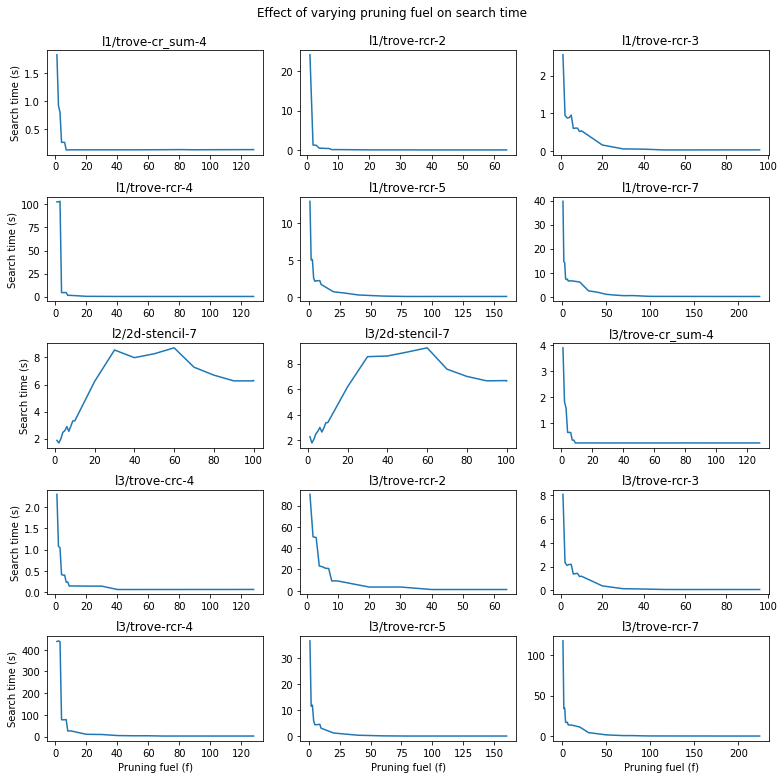

In [31]:
fig, axs = plt.subplots(5, 3, figsize=(11, 11))
for idx, dataset in enumerate(selected_data.groupby('spec')):
    ax = axs[idx // 3][idx % 3]
    name, df = dataset
    df = df.set_index('prune_fuel')
    df.plot(ax=ax, title=name, legend=False)
    ax.set_xlabel('')
for i in range(3):
    axs[-1][i].set_xlabel("Pruning fuel (f)")
for i in range(5):
    axs[i][0].set_ylabel("Search time (s)")
fig.suptitle("Effect of varying pruning fuel on search time")
fig.tight_layout()
fig.subplots_adjust(top=0.925)
None

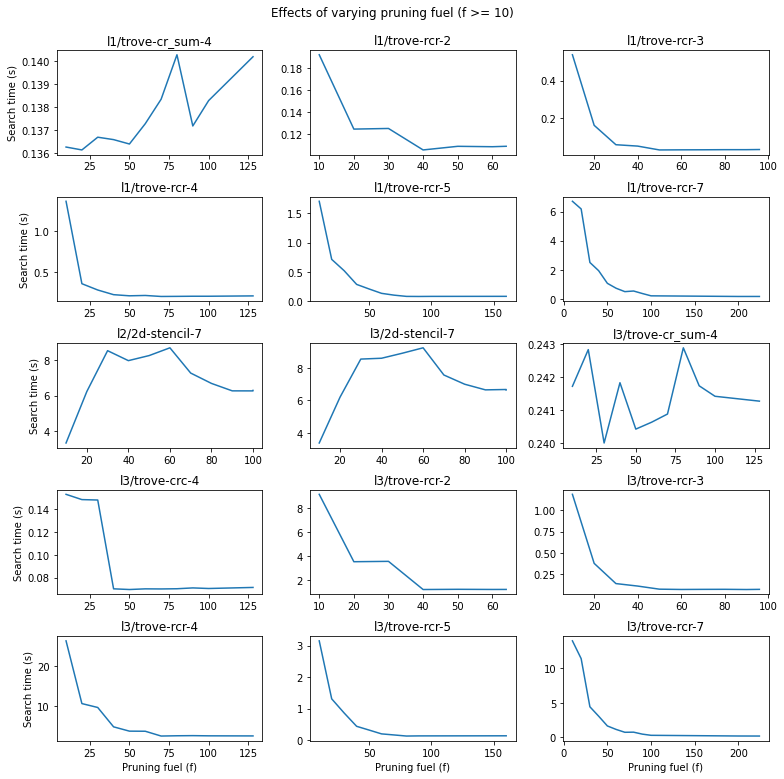

In [32]:
plt.close(fig)
fig, axs = plt.subplots(5, 3, figsize=(11, 11))
for idx, dataset in enumerate(selected_data.groupby('spec')):
    ax = axs[idx // 3][idx % 3]
    name, df = dataset
    df = df[df['prune_fuel'] >= 10]
    df = df.set_index('prune_fuel')
    df.plot(ax=ax, title=name, legend=False)
    ax.set_xlabel('')
for i in range(3):
    axs[-1][i].set_xlabel("Pruning fuel (f)")
for i in range(5):
    axs[i][0].set_ylabel("Search time (s)")
fig.suptitle("Effects of varying pruning fuel (f >= 10)")
fig.tight_layout()
fig.subplots_adjust(top=0.925)

In [22]:
plt.close(fig)

These certainly aren't the results I was expecting to see on these graphs in some cases.

We can preliminary identify a few cases
  1. Stuff like various Trove instance, where setting $f$ too low causes insufficient pruning (and a lot of concrete search) but, once you're past some sweet spot, it really doesn't matter how high $f$ goes. I think (and I'm about to check) that, in these cases, the only time you make a lot of pruning queries is on true positives and, since there aren't duplicate values or the like, the cost of a few extra queries on the small number of true positives is negligible.
  
  The cases where the ideal value of $f$ that produces "enough pruning" is less than 10 end up looking like noise on the plots that eventually trends slightly upward.
  
  2. We have cases like the large 2D stencils, where pruning takes a lot of time, likely due to the large number of copies of each value in the spec. In some of thes specs, we see false positives early on which take a while to be pruned out. The large number of pruning queries makes adding more fuel more expensive, and causes those costs to drawf the savings from more effective pruning.
  
  To test my theory about these problems, I'm going to take a look at how the number of false positives is impacted by the amount of pruning fuel

In [56]:
search_records = []
for spec, records in raw_no_timing.items():
    prev_fuel = 0
    items = []
    for record in records:
        if record['category'] == 'stats':
            items.append(record.copy())
        if record['category'] == 'search':
            for item in items:
                del item['category']
                item['prune_fuel'] = record['prune_fuel']
                item['spec'] = spec
            if record['prune_fuel'] != prev_fuel:
                search_records.extend(items)
            items = []
            prev_fuel = record['prune_fuel']
search_stats = pd.DataFrame(search_records).drop(columns=['key', 'name', 'lane'])

In [57]:
selected_stats = search_stats.set_index('spec')[large_specs].reset_index()
selected_stats = selected_stats[selected_stats['pruning']]

<ipython-input-57-746f32b727ec>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_stats = search_stats.set_index('spec')[large_specs].reset_index()


In [58]:
selected_stats['False positives'] = selected_stats['continued'] - selected_stats['in_solution']

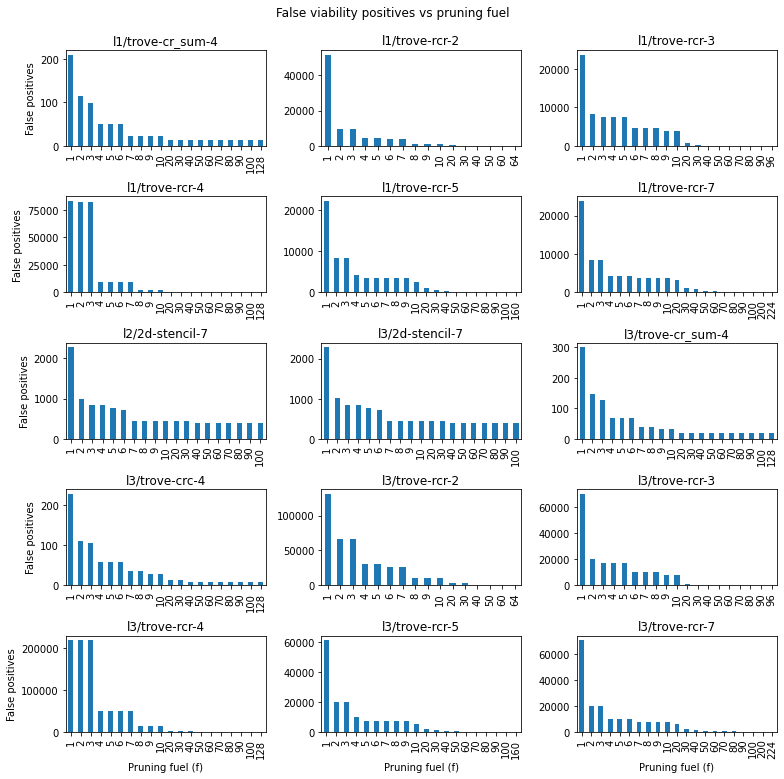

In [59]:
fig, axs = plt.subplots(5, 3, figsize=(11, 11))
for idx, dataset in enumerate(selected_stats.groupby('spec')):
    name, df = dataset
    ax = axs[idx // 3][idx % 3]
    df = df.groupby('prune_fuel')['False positives'].sum()
    df.plot(kind='bar', ax=ax, title=name, legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
for i in range(3):
    axs[-1][i].set_xlabel('Pruning fuel (f)')
for i in range(5):
    axs[i][0].set_ylabel("False positives")
fig.suptitle("False viability positives vs pruning fuel")
fig.tight_layout()
fig.subplots_adjust(top=0.925)

This seems to confirm the insight that there's two cases: things like RCR trove, where the slow search is due to the fact that we fundamentally need to explare a bunch of concrete functions, and ones like the 2D stencil, where part of the problem is spneding increasing amounts of time proving false positives.

The stencil cases might be served by raarranging some of the stops (since there are some steps that are independent with respect to each other we could try rearranging) - I'll try a few versions of the spec nad see what happens.

Another similar graph that might be interesting is fuel vs time spnet pruning.

In [61]:
search_records = []
for spec, records in raw.items():
    prev_fuel = 0
    items = []
    for record in records:
        if record['category'] == 'stats':
            items.append(record.copy())
        if record['category'] == 'search':
            for item in items:
                del item['category']
                item['prune_fuel'] = record['prune_fuel']
                item['spec'] = spec
                item['prune_time_frac'] = item['prune_time'] / record['time']
            if record['prune_fuel'] != prev_fuel:
                search_records.extend(items)
            items = []
            prev_fuel = record['prune_fuel']
search_stats_timing = pd.DataFrame(search_records).drop(columns=['key', 'name', 'lane'])

In [62]:
selected_stats_times = search_stats_timing.set_index('spec')[large_specs].reset_index()
selected_stats_times = selected_stats_times[selected_stats_times['pruning']]

<ipython-input-62-e5248248698b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_stats_times = search_stats_timing.set_index('spec')[large_specs].reset_index()


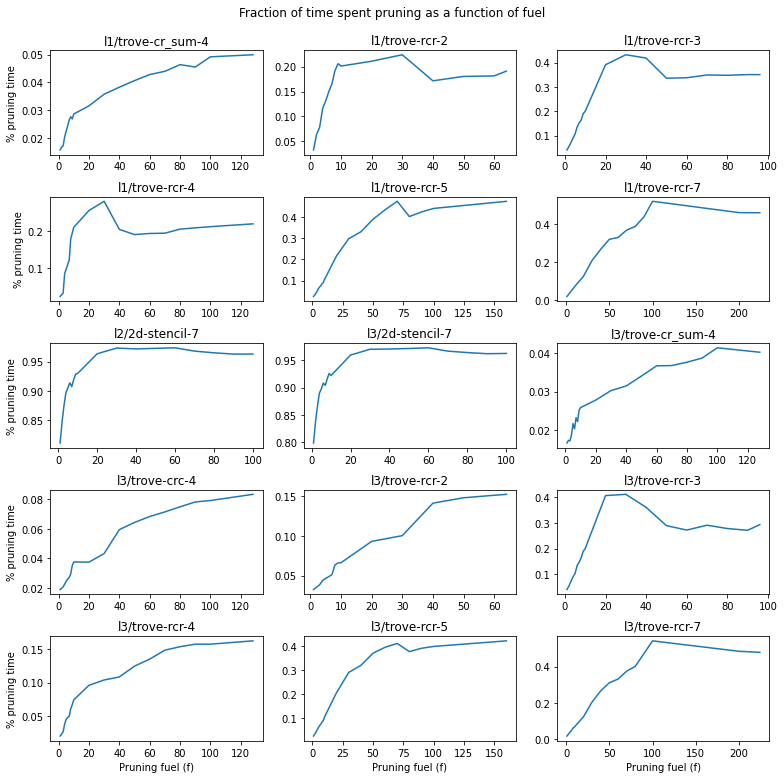

In [64]:
fig, axs = plt.subplots(5, 3, figsize=(11, 11))
for idx, dataset in enumerate(selected_stats_times.groupby('spec')):
    name, df = dataset
    ax = axs[idx // 3][idx % 3]
    df = df.groupby('prune_fuel')['prune_time_frac'].sum()
    df.plot(ax=ax, title=name, legend=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
for i in range(3):
    axs[-1][i].set_xlabel('Pruning fuel (f)')
for i in range(5):
    axs[i][0].set_ylabel("% pruning time")
fig.suptitle("Fraction of time spent pruning as a function of fuel")
fig.tight_layout()
fig.subplots_adjust(top=0.925)

If we look at the y axes on these charts, there's more support for the theory that there's two diffirent ways for search to be slow

1. Search that's dominated by concrete exploration (many of the Trove spetches)
2. Search that's dominated by pruning costs (large stencils)